In [1]:
## Parameters specific to where your folders are and your data
parameter_file = 'params/params.yaml'
import yaml
import sys

with open(parameter_file,'r') as f:
    doc = yaml.load(f)

#p = dic2obj(**doc)

data_folder = doc['data_folder']
tissues = doc['tissues'].split(',')
sys.path.append(doc['pipeline_path'])
ref_fa = doc['ref_fa']
anno_gff=doc['annotation']
mRNA_peak_file = doc["mRNA_peak_file"]

tss_annotation = doc['tss_annotation']


import os
os.chdir
import sys
import pandas as pd
import matplotlib
import seaborn as sns
import pickle
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from itertools import product
import glob
import re
from matplotlib_venn import venn2
from matplotlib import rcParams
import inspect
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sys.setrecursionlimit(3000)
%load_ext autoreload
%autoreload 2
rcParams['figure.figsize'] = 8, 6
import tqdm

from os.path import basename
##mpl.use('Agg')
#mpl.style.use('ggplot')
#mpl.style.use('fivethirtyeight')
from Homer import *

print('Number of tissues: ',len(tissues))

('Number of tissues: ', 15)


# Panel A + B 
A: histogram  
B: Heat map

peak options:  
1) From output   
2) From txn_df peaks  
3) CHO-specific  
4) From output but peak 1 vs others .  

Tag Options:  
1) All merged  
2) CHO-Specific

## i. Peak option 1; Tag option 1

In [28]:
## Create RefSeq peak file for this
peak_f = "Results/output/TSS1.exp.bed"
i = peak_f
tag_f = "Results/merged/tags_TSS_merged"


#i = "Results/tss_annotation_peaks/all_peaks_gene_df_01.tsv"
mrna_filt = "Results/Figures/Figure3/A.mrna"
peakFileToPeakFile(mRNA_peak_file,i,distance=1000,f_save=mrna_filt,is_peak=False,is_bed=True)


      Chr  Start    End Strand
0  picr_0  45848  45998      -
1  picr_0  44417  44567      -
2  picr_0  20916  21066      +
3  picr_0  98730  98880      -
4  picr_0  98401  98551      -


transcript_id       Chr    Start      End Strand  actual_start  \
3           asmbl_5    picr_0    44541    44543      -         44542   
4           asmbl_6    picr_0    45911    45913      -         45912   
5           asmbl_4    picr_0    46629    46631      -         46630   
6           asmbl_7    picr_0    44596    44598      -         44597   
7           asmbl_8    picr_0    44596    44598      -         44597   
8           asmbl_9    picr_0    44567    44569      -         44568   
9          asmbl_10    picr_0    44512    44514      -         44513   
11         asmbl_12    picr_0    20786    20788      +         20787   
12         asmbl_13    picr_0    20941    20943      +         20942   
13         asmbl_14    picr_0    20941    20943      +         20942   
15         asmbl_16    picr_0    44548    44550      -         44549   
16         asmbl_17    picr_0    98921    98923      -         98922   
18         asmbl_19    picr_0    78254    78256      -         78255   
19         asmbl_20    picr_0    92199    92201      -         92200   
20         asmbl_21    picr_0   185874   185876      -        185875   
22         asmbl_22    picr_0   185759   185761      -        185760   
23         asmbl_23    picr_0   185759   185761      -        185760   
24         asmbl_25    picr_0   185874   185876      -        185875   
25         asmbl_29    picr_0   185874   185876      -        185875   
26         asmbl_24    picr_0   186292   186294      -        186293   
27         asmbl_30    picr_0   185720   185722      -        185721   
30         asmbl_31    picr_0   298240   298242      -        298241   
31         asmbl_33    picr_0   275779   275781      -        275780   
32         asmbl_32    picr_0   298240   298242      -        298241   
33         asmbl_39    picr_0   398906   398908      -        398907   
34         asmbl_41    picr_0   398869   398871      -        398870   
35         asmbl_42    picr_0   398884   398886      -        398885   
36         asmbl_43    picr_0   398849   398851      -        398850   
37         asmbl_37    picr_0   364398   364400      -        364399   
38         asmbl_45    picr_0   398868   398870      -        398869   
...             ...       ...      ...      ...    ...           ...   
77800   asmbl_86718   picr_99  1816435  1816437      +       1816436   
77801   asmbl_86719   picr_99  1817515  1817517      +       1817516   
77802   asmbl_86720   picr_99  1818198  1818200      +       1818199   
77806   asmbl_86745   picr_99  2900538  2900540      -       2900539   
77808   asmbl_86747   picr_99  3427884  3427886      +       3427885   
77809   asmbl_86748   picr_99  3485540  3485542      +       3485541   
77814   asmbl_86753   picr_99  4062710  4062712      -       4062711   
77815   asmbl_86755   picr_99  4062710  4062712      -       4062711   
77816   asmbl_86752   picr_99  4062760  4062762      -       4062761   
77817   asmbl_86757   picr_99  4062760  4062762      -       4062761   
77818   asmbl_86756   picr_99  4062760  4062762      -       4062761   
77819   asmbl_86760   picr_99  3933612  3933614      -       3933613   
77820   asmbl_86759   picr_99  3933612  3933614      -       3933613   
77821   asmbl_86758   picr_99  3933612  3933614      -       3933613   
77822   asmbl_86761   picr_99  3933612  3933614      -       3933613   
77823   asmbl_86762   picr_99  3933612  3933614      -       3933613   
77824   asmbl_86764   picr_99  4131230  4131232      -       4131231   
77825   asmbl_86763   picr_99  4131230  4131232      -       4131231   
77827   asmbl_86766   picr_99  4148700  4148702      +       4148701   
77828   asmbl_86767   picr_99  4149206  4149208      +       4149207   
77829   asmbl_86768   picr_99  4150630  4150632      +       4150631   
77834   asmbl_86778   picr_99  6824663  6824665      +       6824664   
77835   asmbl_86776   picr_99  6824663  6824665      +       6824664   
77836   asmbl_86777   picr_99  6824756  682475

('output histogram mrna', 'Results/Figures/Figure3/A.mrna.hist')
annotatePeaks.pl Results/Figures/Figure3/A.mrnafilt /data/isshamie/genome/picr_final/picr.fa -gff /data/isshamie/genome/picr_final/final.gff3 -fragLength 1 -size 4000 -hist 25 -d Results/merged/tags_TSS_merged -pc 3 > Results/Figures/Figure3/A.mrna.hist
annotatePeaks.pl Results/Figures/Figure3/A.mrnafilt /data/isshamie/genome/picr_final/picr.fa -gff /data/isshamie/genome/picr_final/final.gff3 -fragLength 1 -size 4000 -hist 25 -histNorm 100 -d Results/merged/tags_TSS_merged -pc 3 > Results/Figures/Figure3/A.mrna.histNorm
annotatePeaks.pl Results/Figures/Figure3/A.mrnafilt /data/isshamie/genome/picr_final/picr.fa -gff /data/isshamie/genome/picr_final/final.gff3 -fragLength 1 -size 4000 -hist 25 -ghist -d Results/merged/tags_TSS_merged -pc 3 -strand + > Results/Figures/Figure3/A.mrna.histMatS
annotatePeaks.pl Results/Figures/Figure3/A.mrnafilt /data/isshamie/genome/picr_final/picr.fa -gff /data/isshamie/genome/picr_final/fin

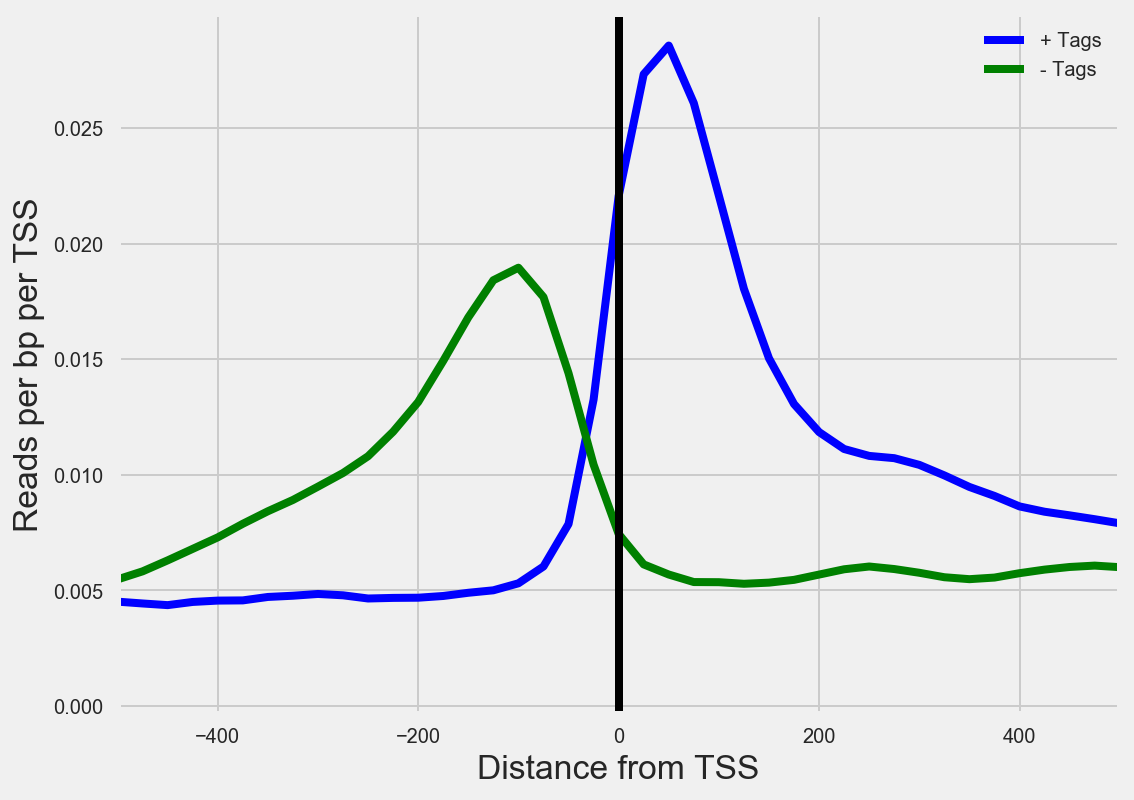

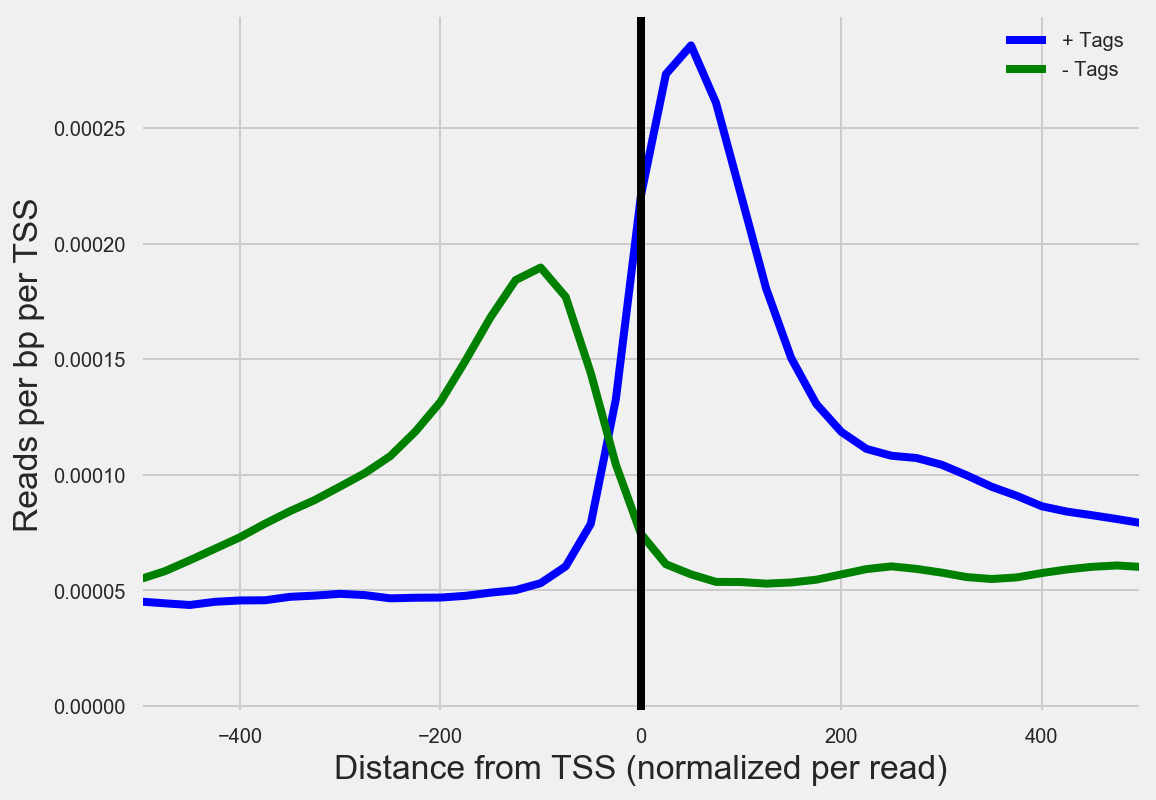

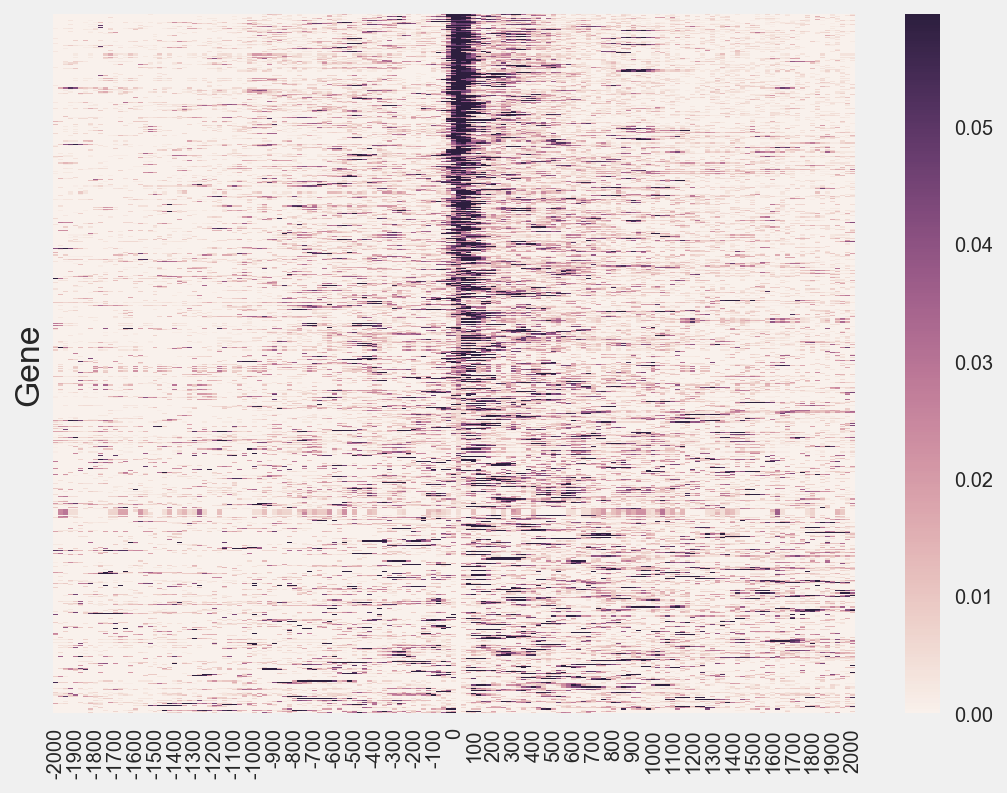

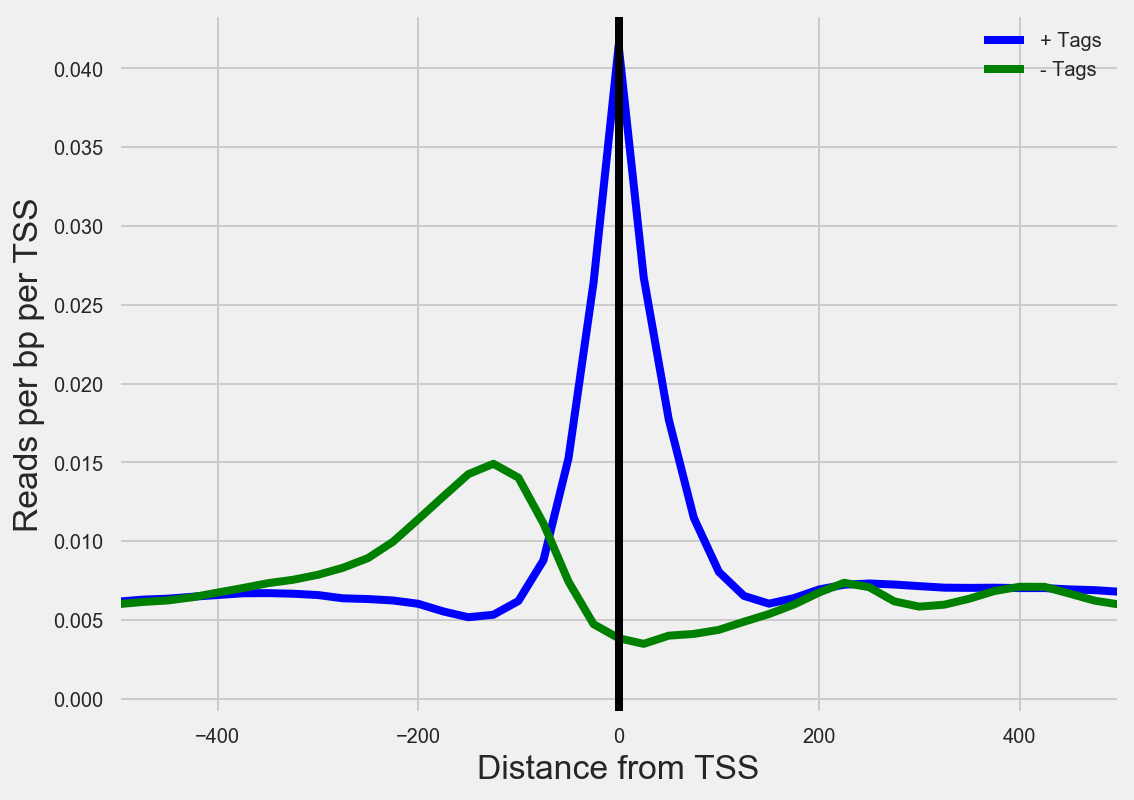

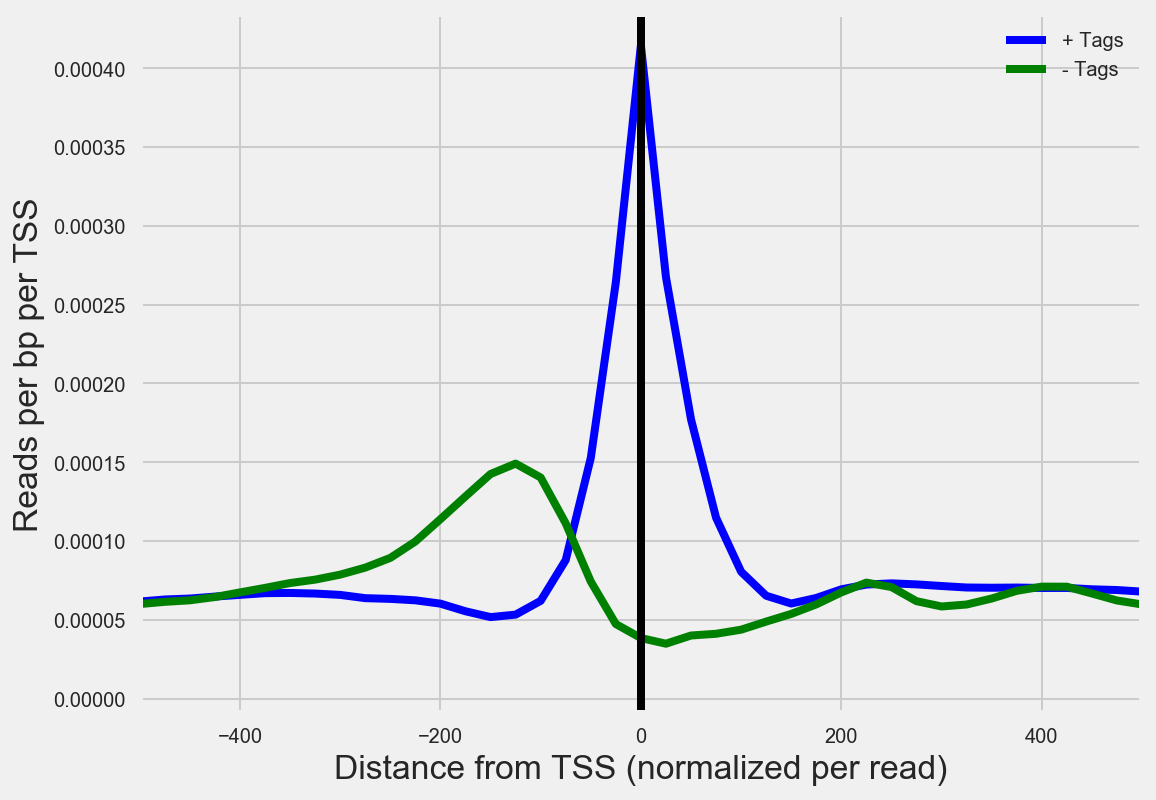

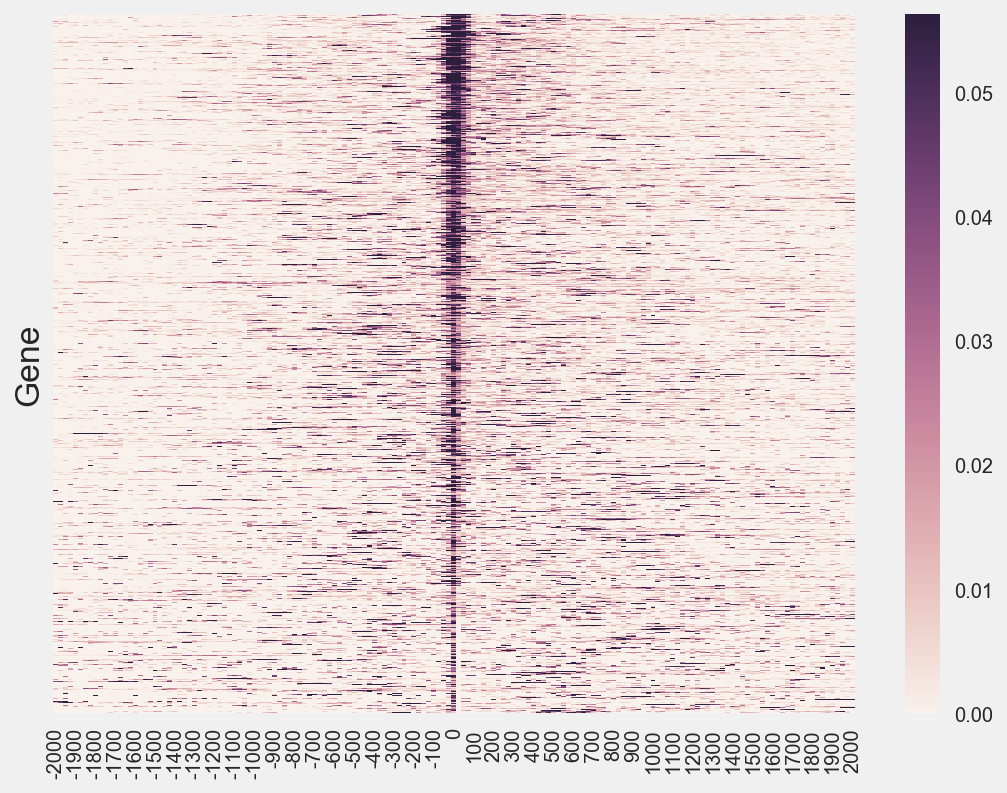

In [29]:
# Refseq 
output_file_mrna = "Results/Figures/Figure3/A.mrna.hist"
print('output histogram mrna',output_file_mrna)
hist(tag_f,output_file_mrna,ref_fa,anno_gff,mode='peak',peak=mrna_filt+'filt',region=4000,res=25,pc=3)
hist_plot(output_file_mrna)
heat_plot(output_file_mrna+'MatS',save_f = output_file_mrna + '.heat.png' )

# Experimental 
output_file_exp = "Results/Figures/Figure3/A.exp.hist"
print('output histogram exp',output_file_exp)
hist(tag_f,output_file_exp,ref_fa,anno_gff,mode='peak',peak=peak_f,region=4000,res=25,pc=3)
hist_plot(output_file_exp)
heat_df = heat_plot(output_file_exp+'MatS',save_f = output_file_exp + '.heat.png' )

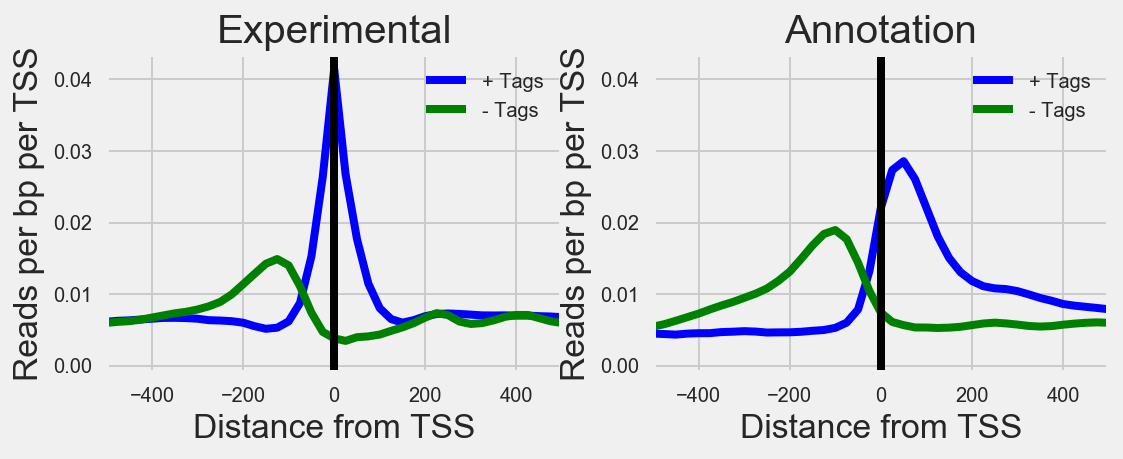

In [34]:
wrap_hist_plot([output_file_exp,
                output_file_mrna], hist_save="Results/Figures/Figure3/A.combine.png",
                    names=["Experimental","Annotation"])

## ii. Tags from CHO GRO-Cap

('output histogram mrna', 'Results/Figures/Figure3/A_ii.mrna.hist')
annotatePeaks.pl Results/Figures/Figure3/A_ii.mrnafilt /data/isshamie/genome/picr_final/picr.fa -gff /data/isshamie/genome/picr_final/final.gff3 -fragLength 1 -size 4000 -hist 25 -d /data/isshamie/TSS/1015_Processed/CHO/GROCap/f03_tags/trim_CHO_GROCap1.fastq -pc 3 > Results/Figures/Figure3/A_ii.mrna.hist
annotatePeaks.pl Results/Figures/Figure3/A_ii.mrnafilt /data/isshamie/genome/picr_final/picr.fa -gff /data/isshamie/genome/picr_final/final.gff3 -fragLength 1 -size 4000 -hist 25 -histNorm 100 -d /data/isshamie/TSS/1015_Processed/CHO/GROCap/f03_tags/trim_CHO_GROCap1.fastq -pc 3 > Results/Figures/Figure3/A_ii.mrna.histNorm
annotatePeaks.pl Results/Figures/Figure3/A_ii.mrnafilt /data/isshamie/genome/picr_final/picr.fa -gff /data/isshamie/genome/picr_final/final.gff3 -fragLength 1 -size 4000 -hist 25 -ghist -d /data/isshamie/TSS/1015_Processed/CHO/GROCap/f03_tags/trim_CHO_GROCap1.fastq -pc 3 -strand + > Results/Figures/Fi

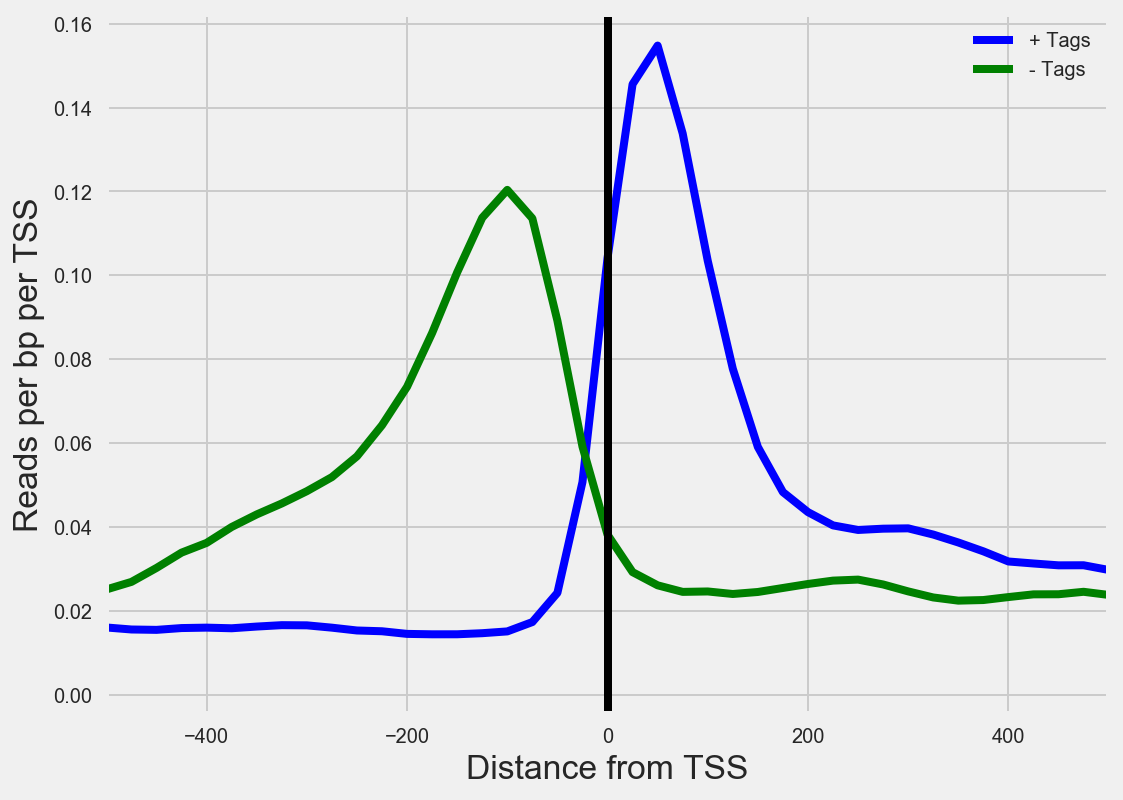

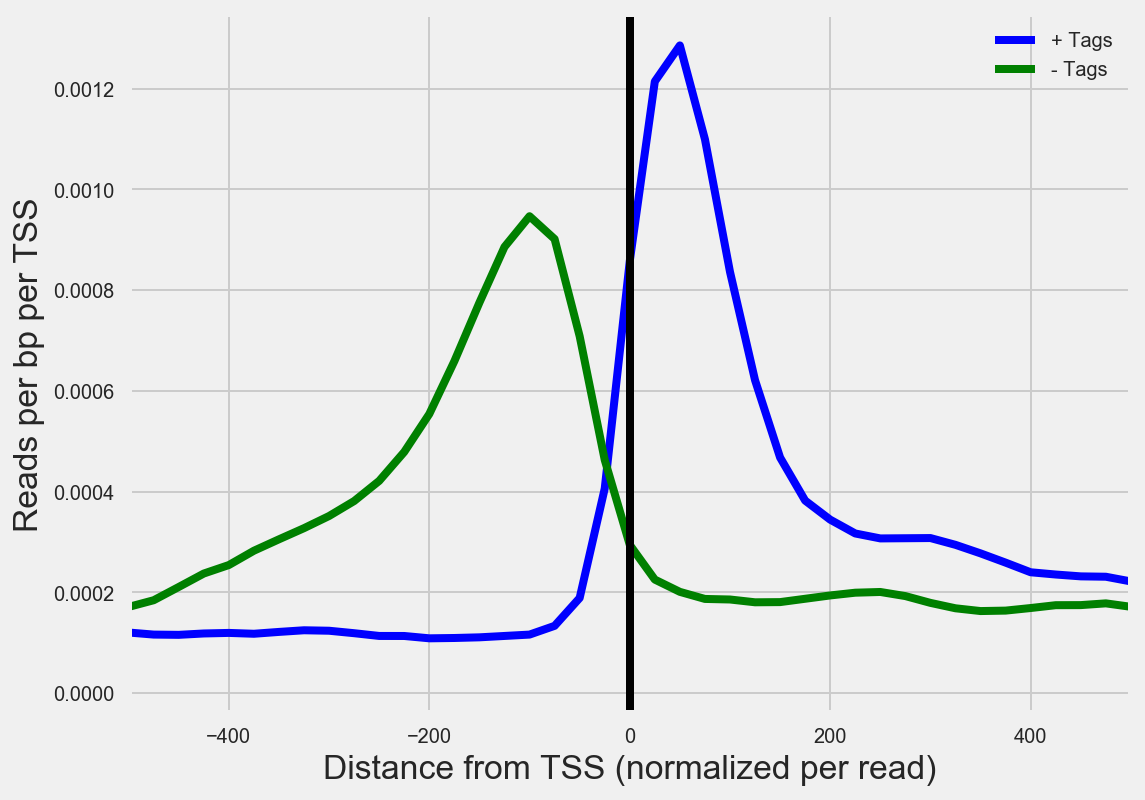

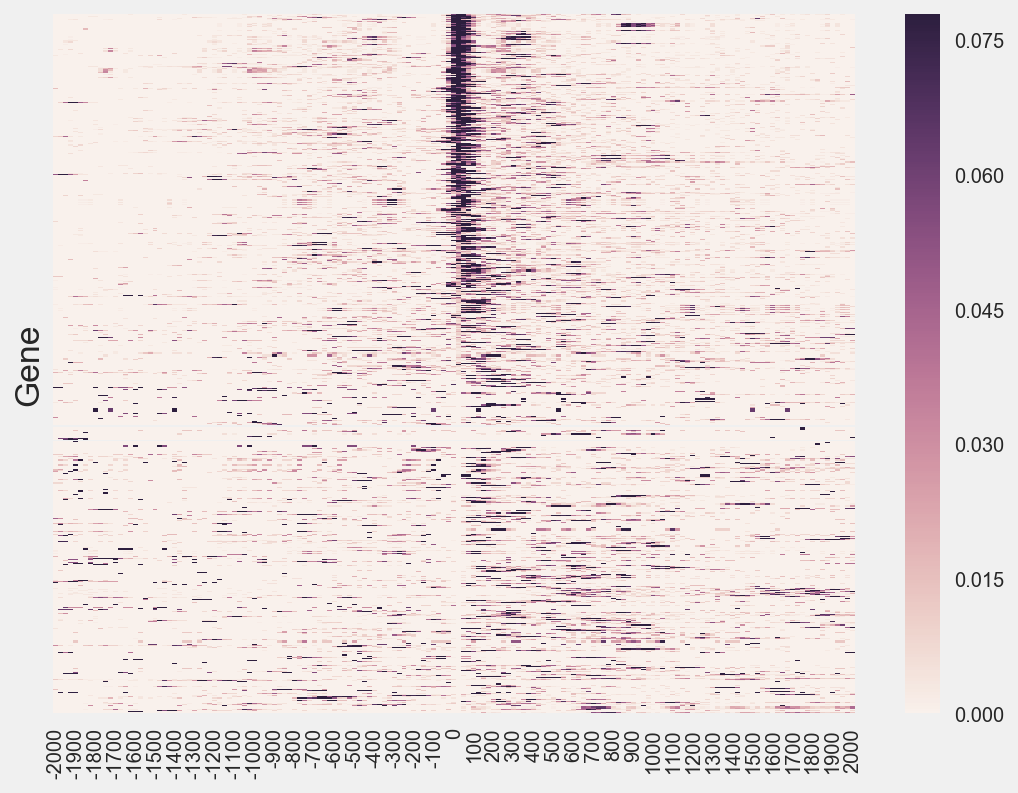

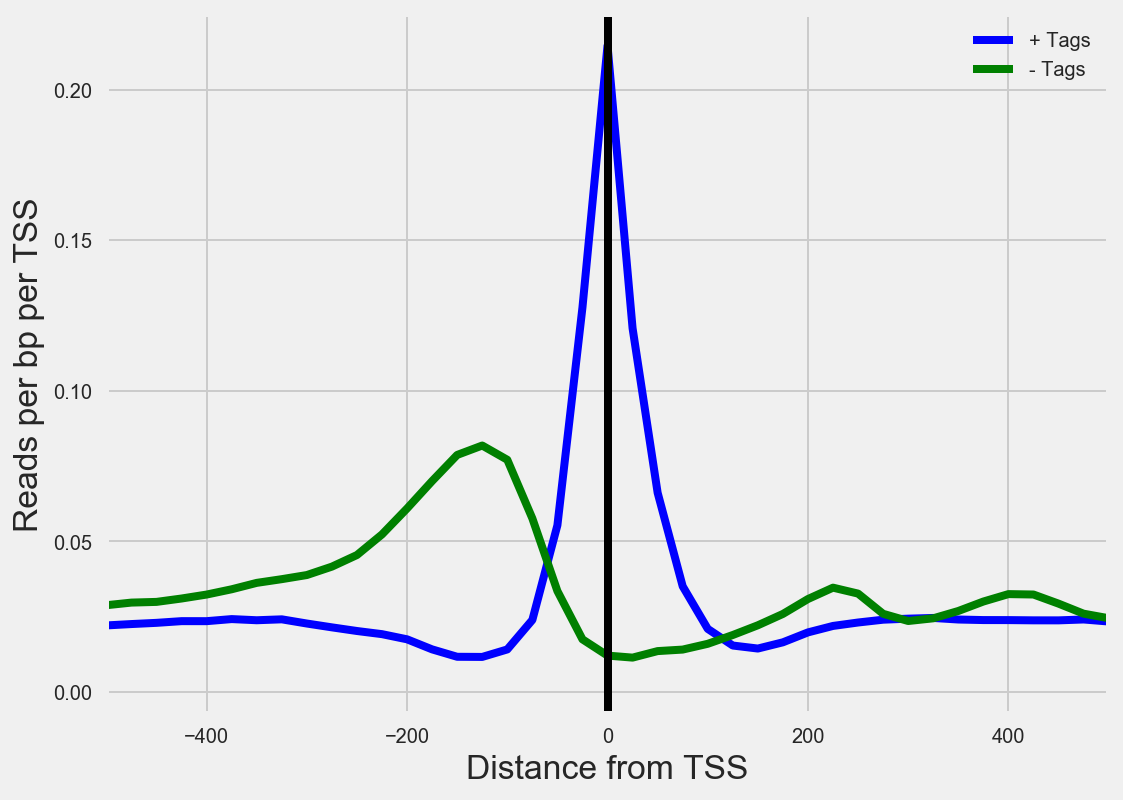

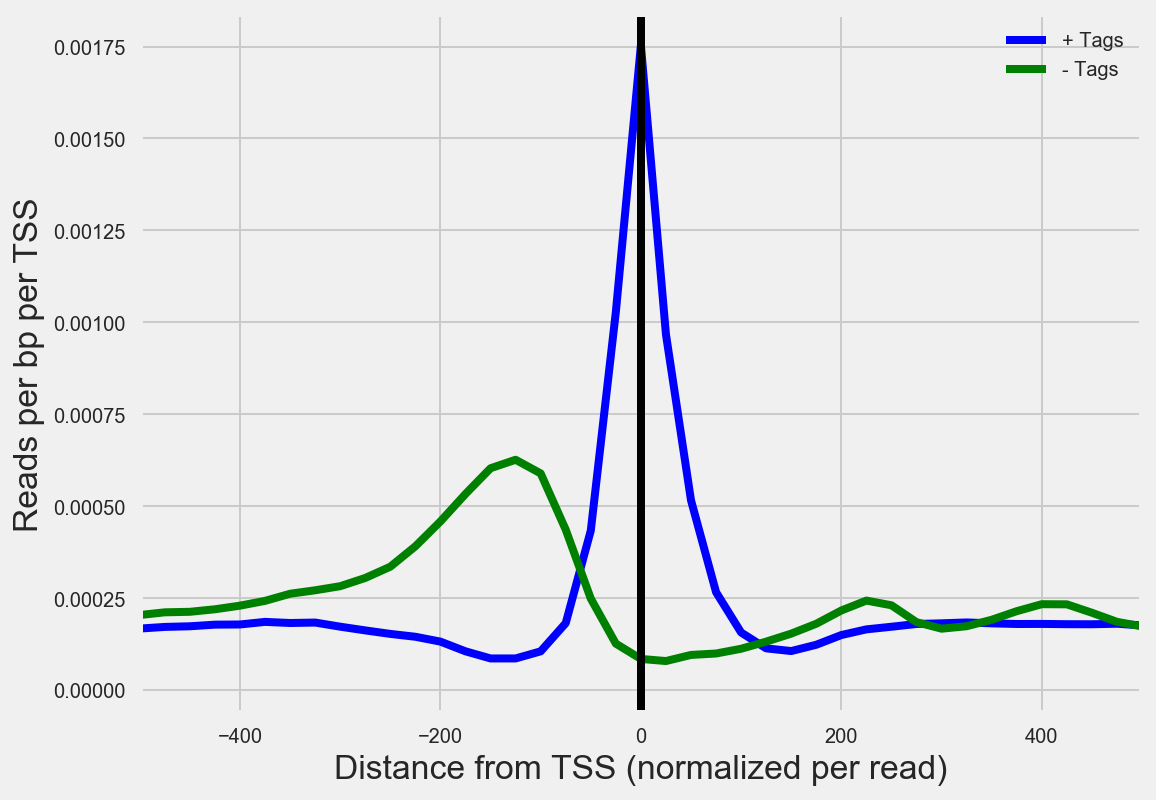

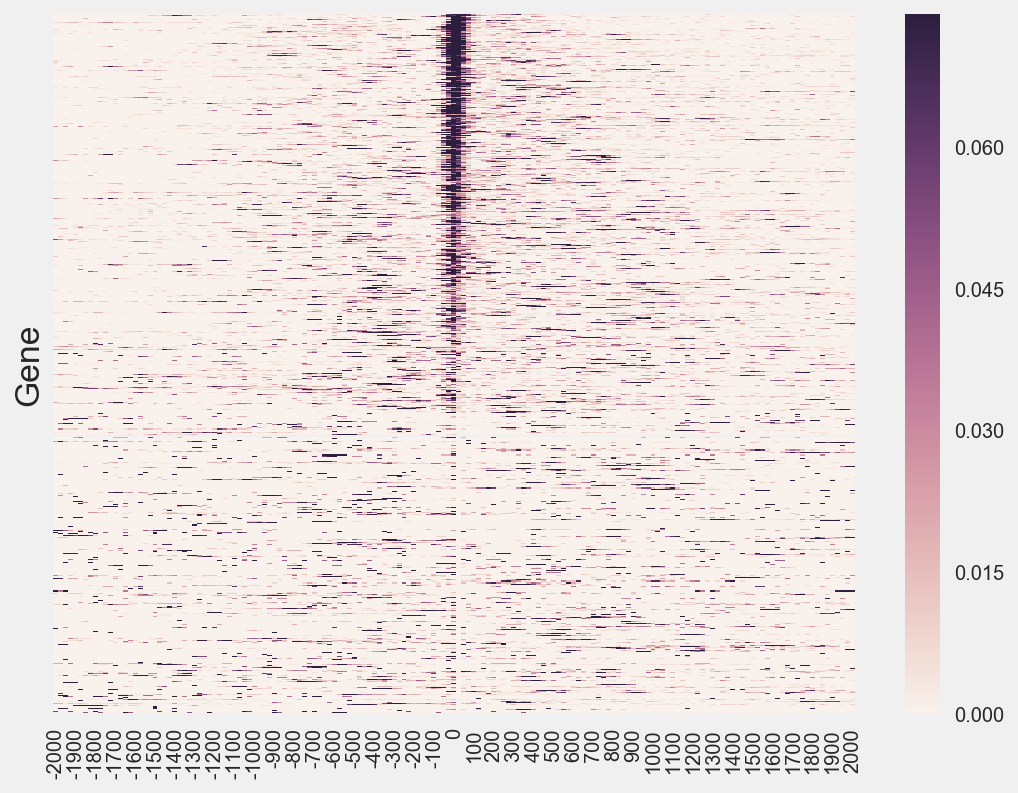

In [43]:
# Refseq 

peak_f = "Results/output/TSS1.exp.bed"
i = peak_f
tag_f = os.path.join(data_folder,"CHO/GROCap/f03_tags/trim_CHO_GROCap1.fastq")

## Create RefSeq peak file for this
mrna_filt = "Results/Figures/Figure3/A_ii.mrna"
peakFileToPeakFile(mRNA_peak_file,i,distance=1000,f_save=mrna_filt,is_peak=False,is_bed=True)
output_file_mrna = "Results/Figures/Figure3/A_ii.mrna.hist"
print('output histogram mrna',output_file_mrna)
hist(tag_f,output_file_mrna,ref_fa,anno_gff,mode='peak',peak=mrna_filt+'filt',region=4000,res=25,pc=3)
hist_plot(output_file_mrna)
heat_plot(output_file_mrna+'MatS',save_f = output_file_mrna + '.heat.png' )

# Experimental 
output_file_exp = "Results/Figures/Figure3/A_ii.exp.hist"
print('output histogram exp',output_file_exp)
hist(tag_f,output_file_exp,ref_fa,anno_gff,mode='peak',peak=peak_f,region=4000,res=25,pc=3)
hist_plot(output_file_exp)
heat_df = heat_plot(output_file_exp+'MatS',save_f = output_file_exp + '.heat.png' )

## iii. Peaks 

# C. 

## i. 

annotatePeaks.pl Results/Figures/Figure3/A.mrnafilt /data/isshamie/genome/picr_final/picr.fa -size 200 -hist 1 -di > Results/Figures/Figure3/C_i_refseq.nuc_freq_200.txt


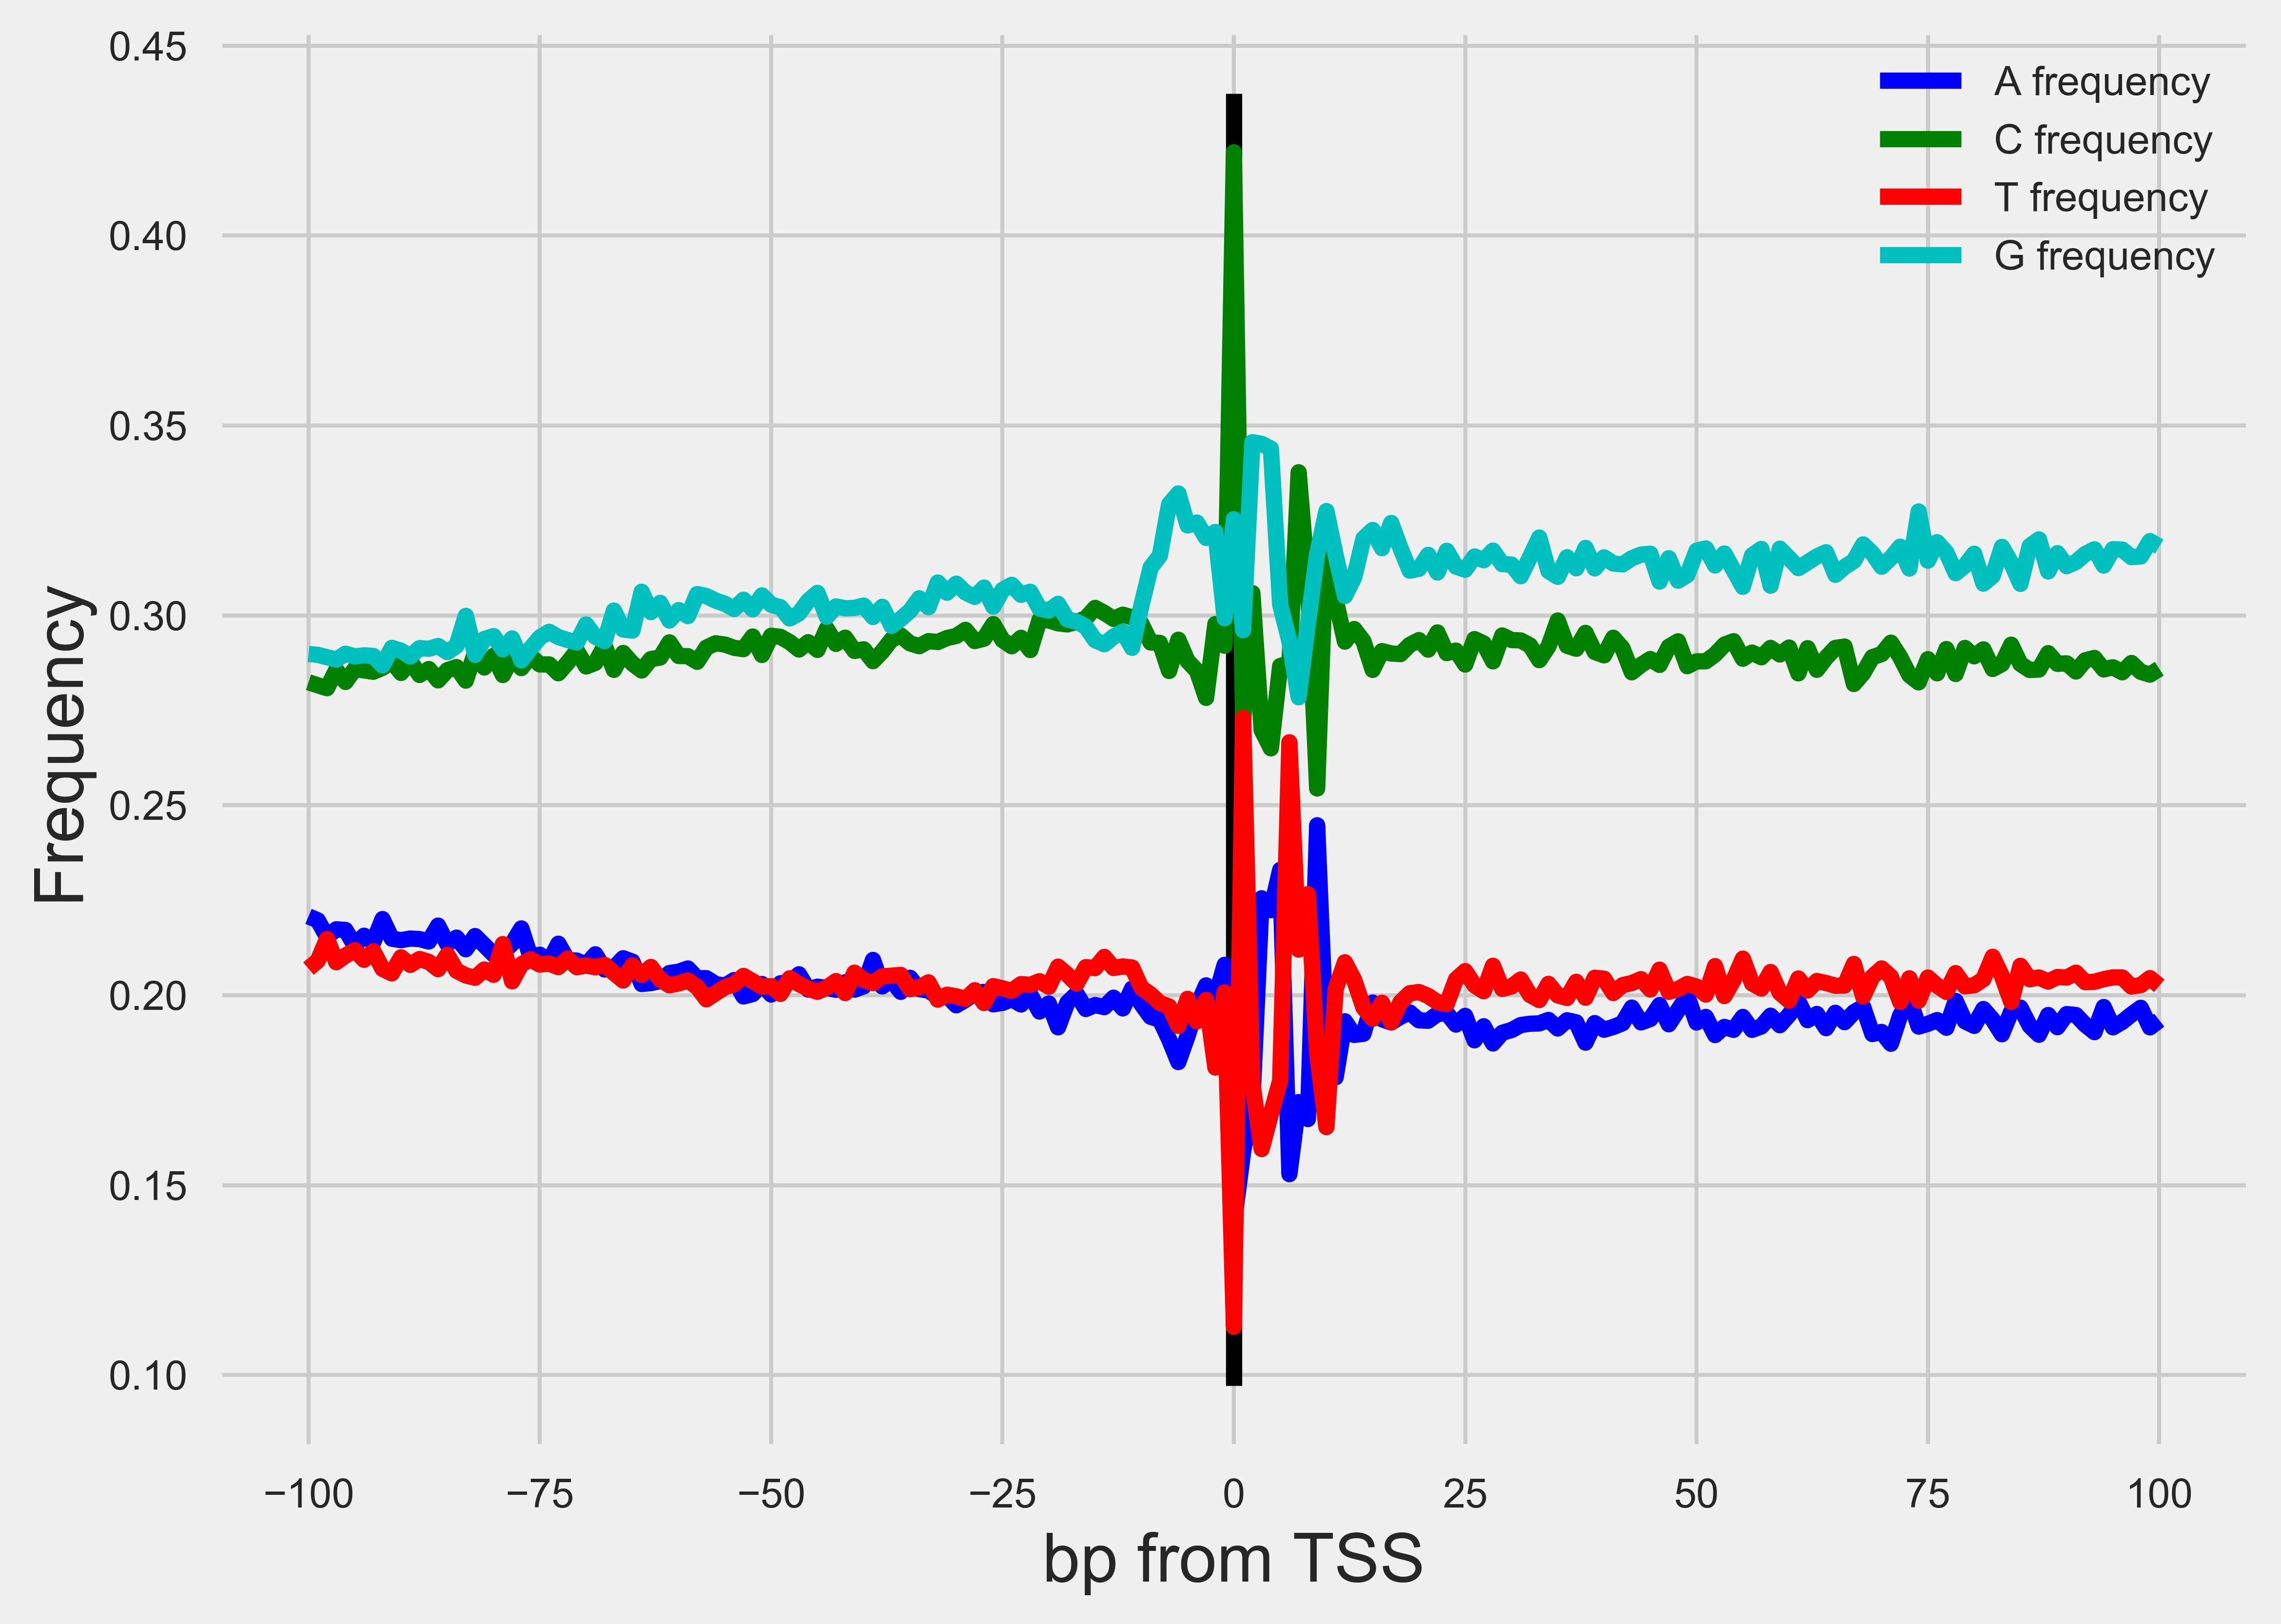

In [46]:
mrna_filt = "Results/Figures/Figure3/A.mrna"
homer_nucleotide(mrna_filt+'filt',
    'Results/Figures/Figure3/C_i_refseq.nuc_freq_200.txt',
    ref_fa,
    size=200)

annotatePeaks.pl Results/output/TSS1.exp.bed /data/isshamie/genome/picr_final/picr.fa -size 200 -hist 1 -di > Results/Figures/Figure3/C_i_exp.nuc_freq_200.txt


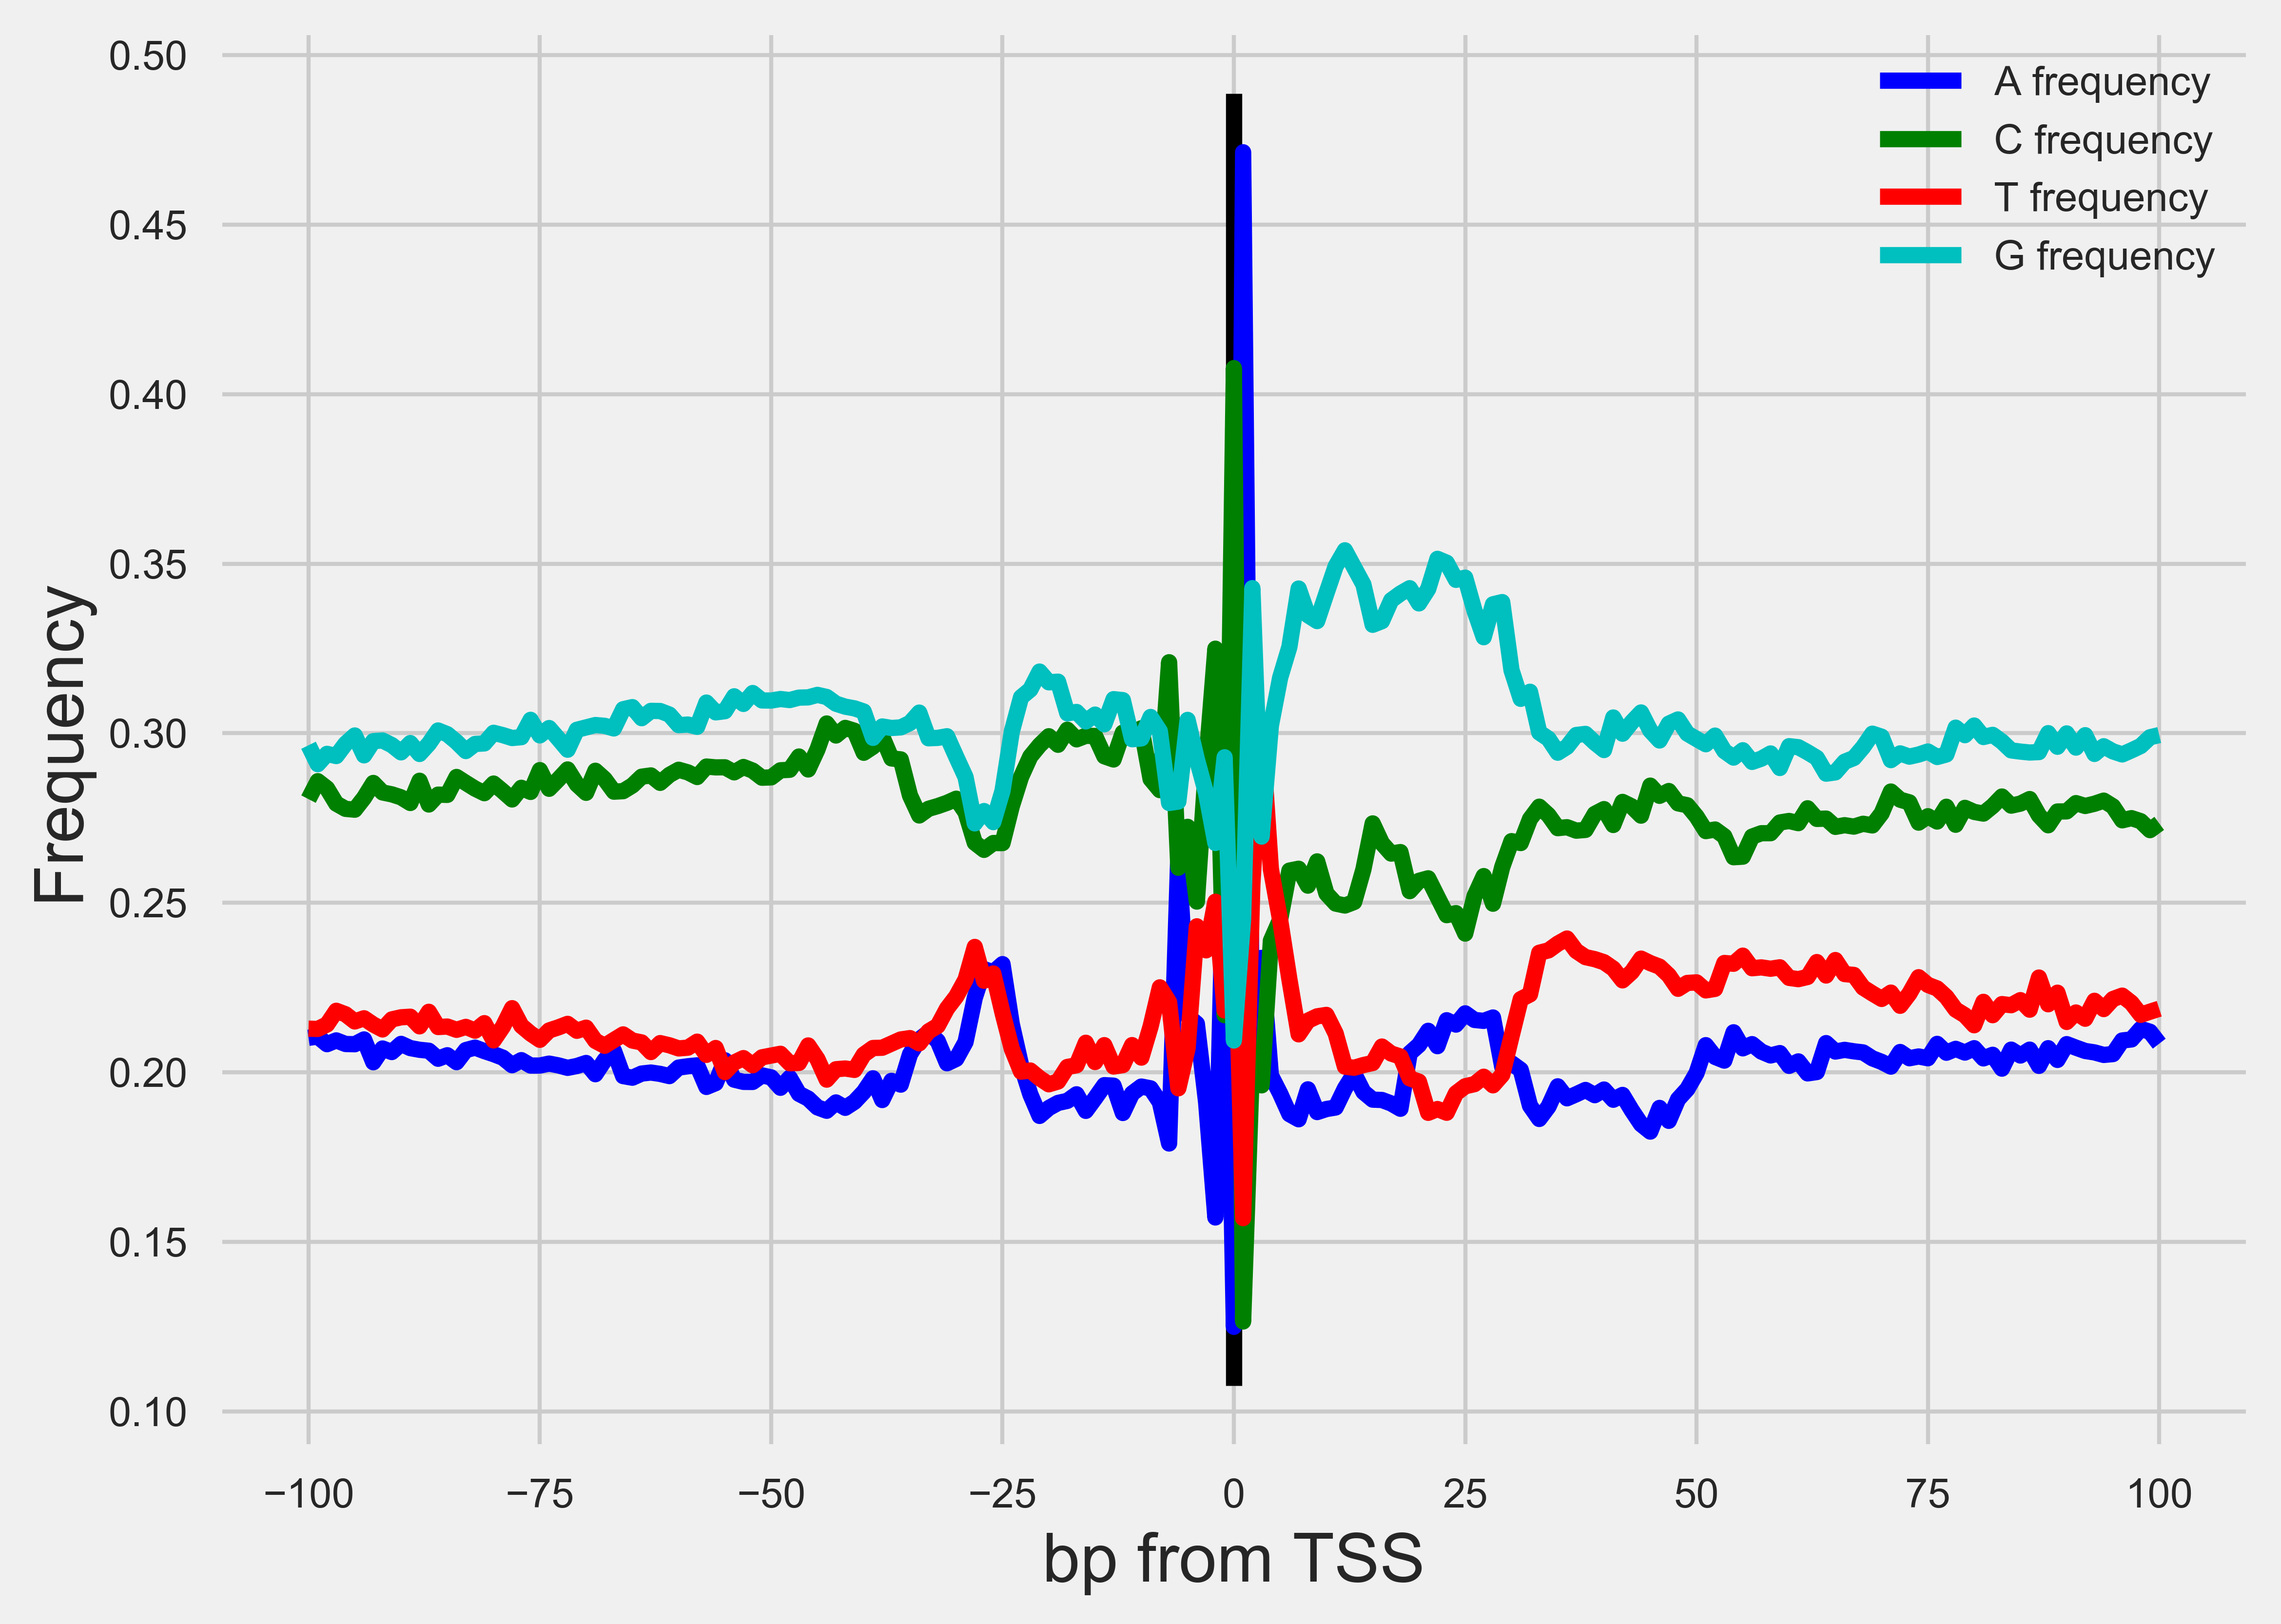

In [47]:
homer_nucleotide("Results/output/TSS1.exp.bed",
    'Results/Figures/Figure3/C_i_exp.nuc_freq_200.txt',
    ref_fa,
    size=200)

## ii. CHO-specific peaks and CHO-specific tags

annotatePeaks.pl Results/Figures/Figure3/A_ii.mrnafilt /data/isshamie/genome/picr_final/picr.fa -size 200 -hist 1 -di > Results/Figures/Figure3/C_ii_refseq.nuc_freq_200.txt


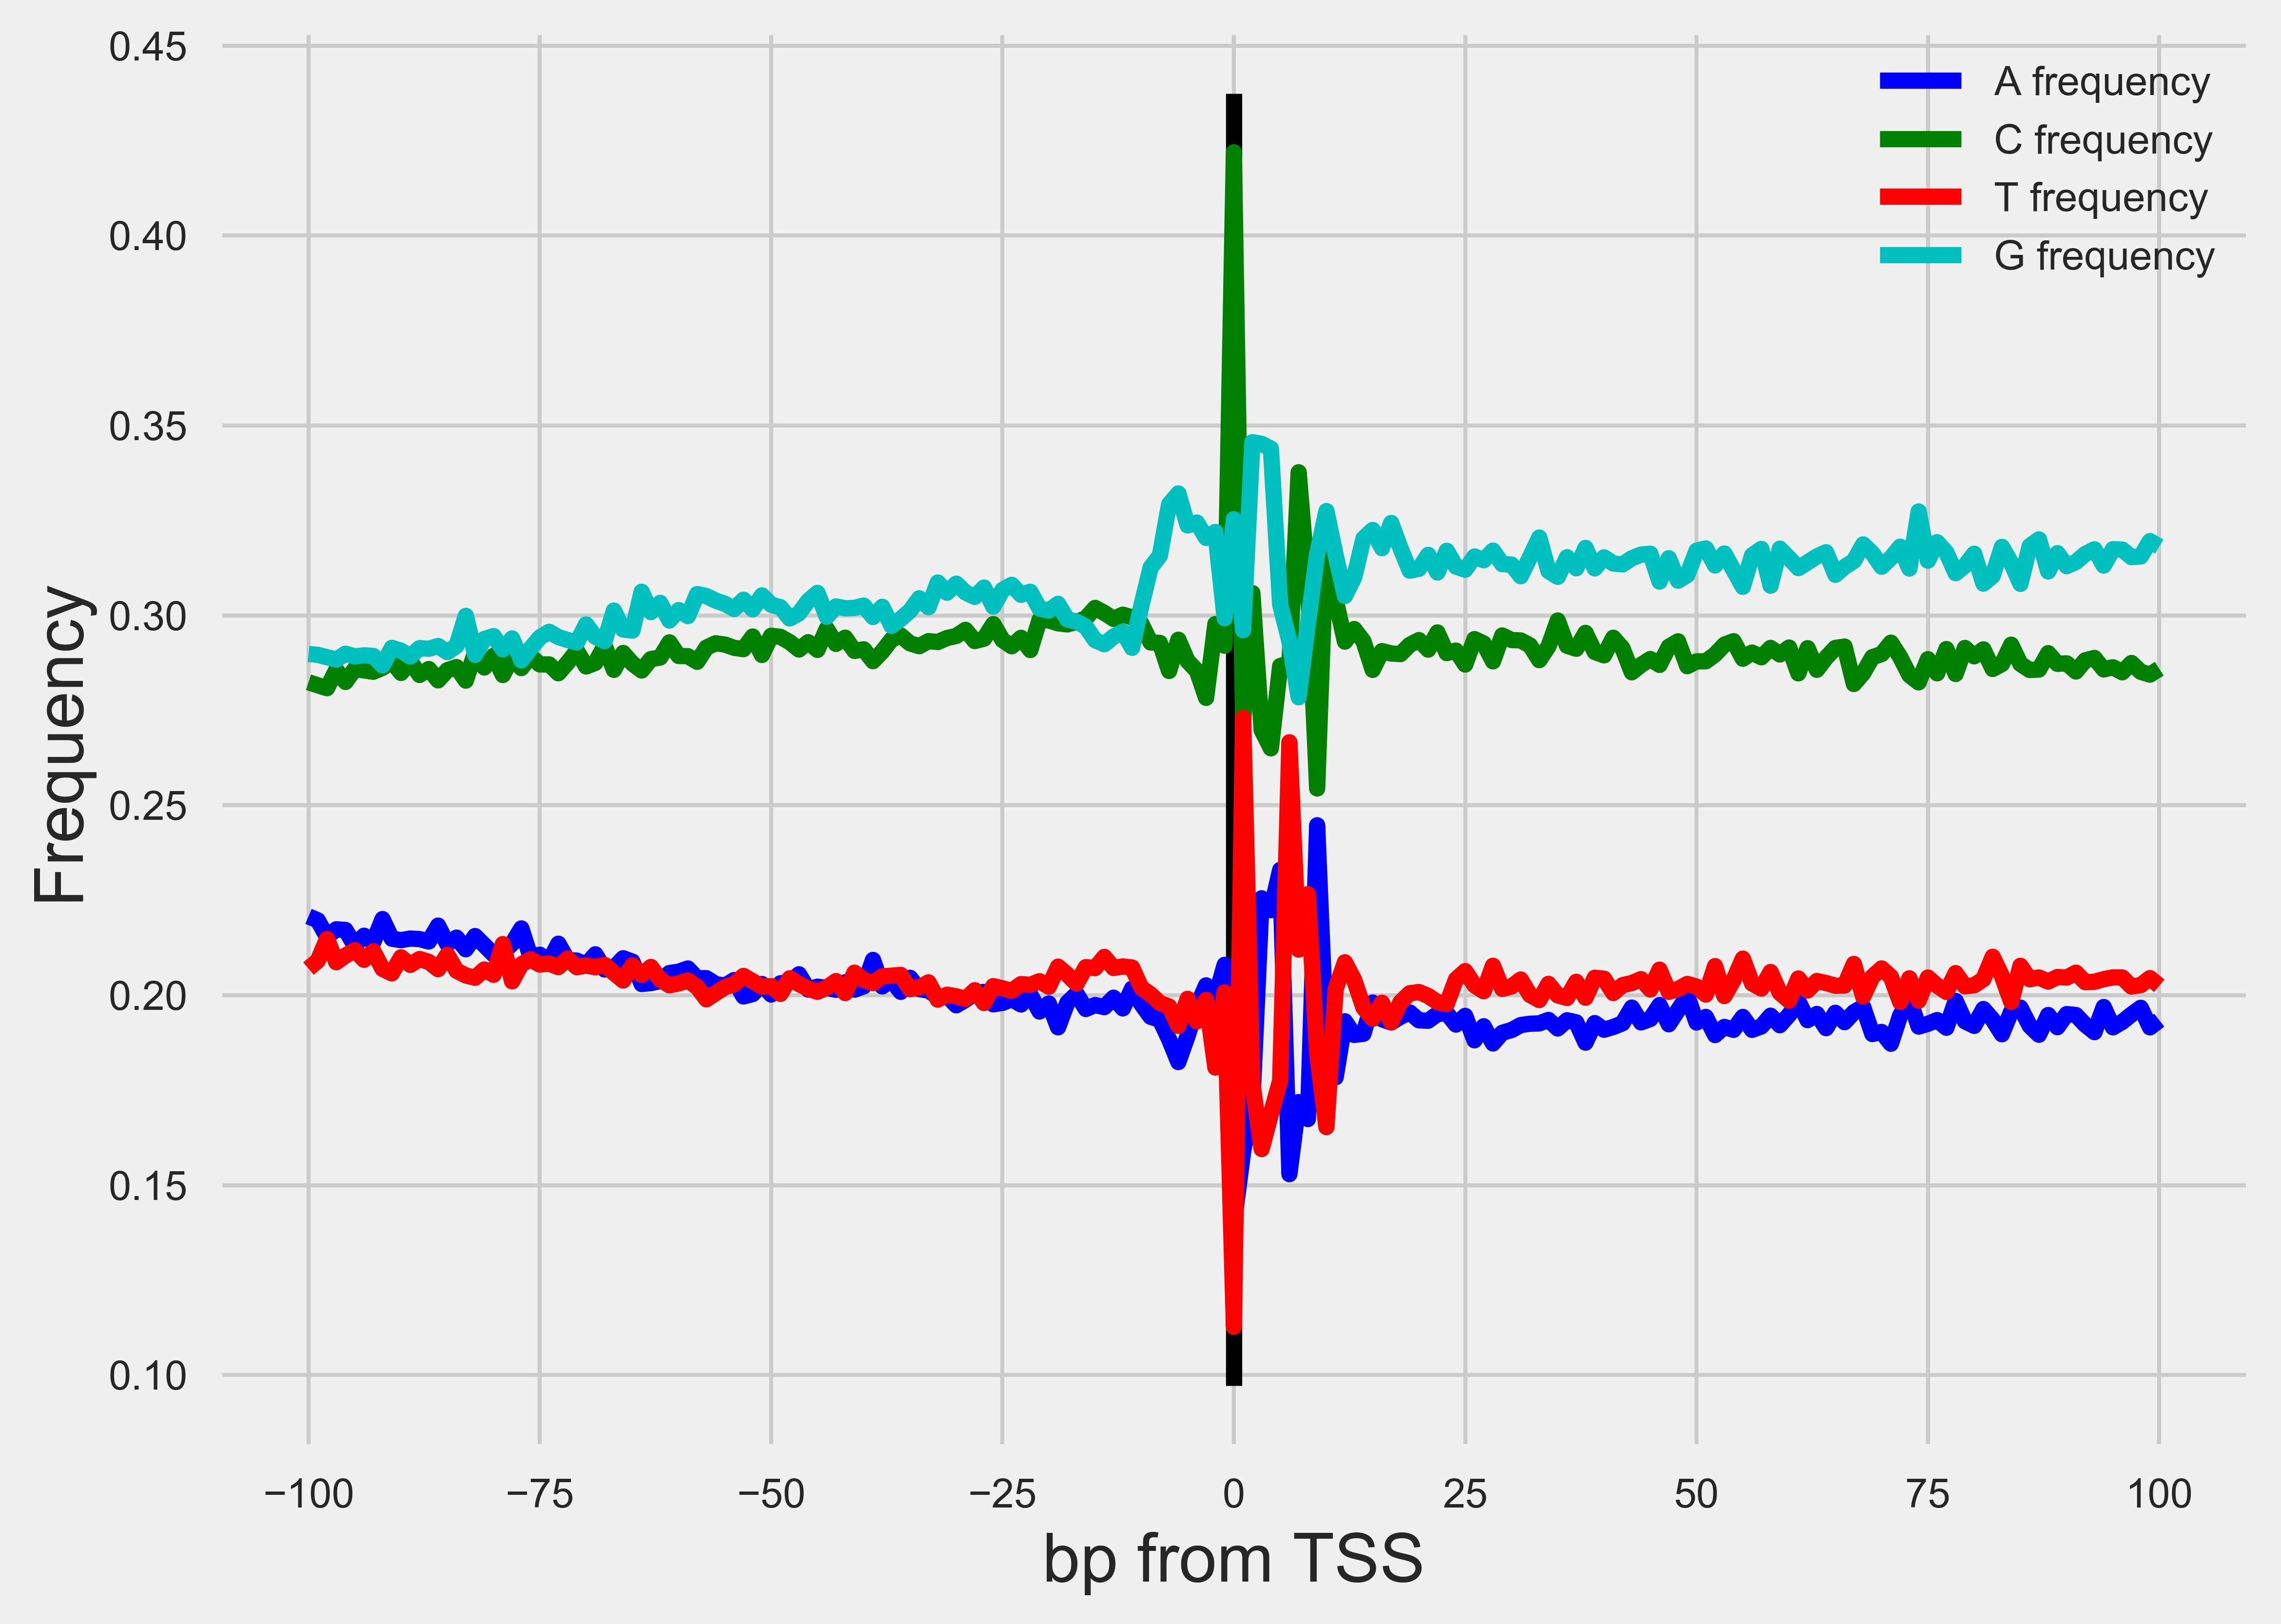

In [44]:
mrna_filt = "Results/Figures/Figure3/A_ii.mrna"
homer_nucleotide(mrna_filt+'filt',
    'Results/Figures/Figure3/C_ii_refseq.nuc_freq_200.txt',
    ref_fa,
    size=200)

annotatePeaks.pl Results/tss_annotation_peaks/sample_CHO_GROCap1_and_CHO_GRO1.tsv /data/isshamie/genome/picr_final/picr.fa -size 200 -hist 1 -di > Results/Figures/Figure3/C_ii_exp.nuc_freq_200.txt


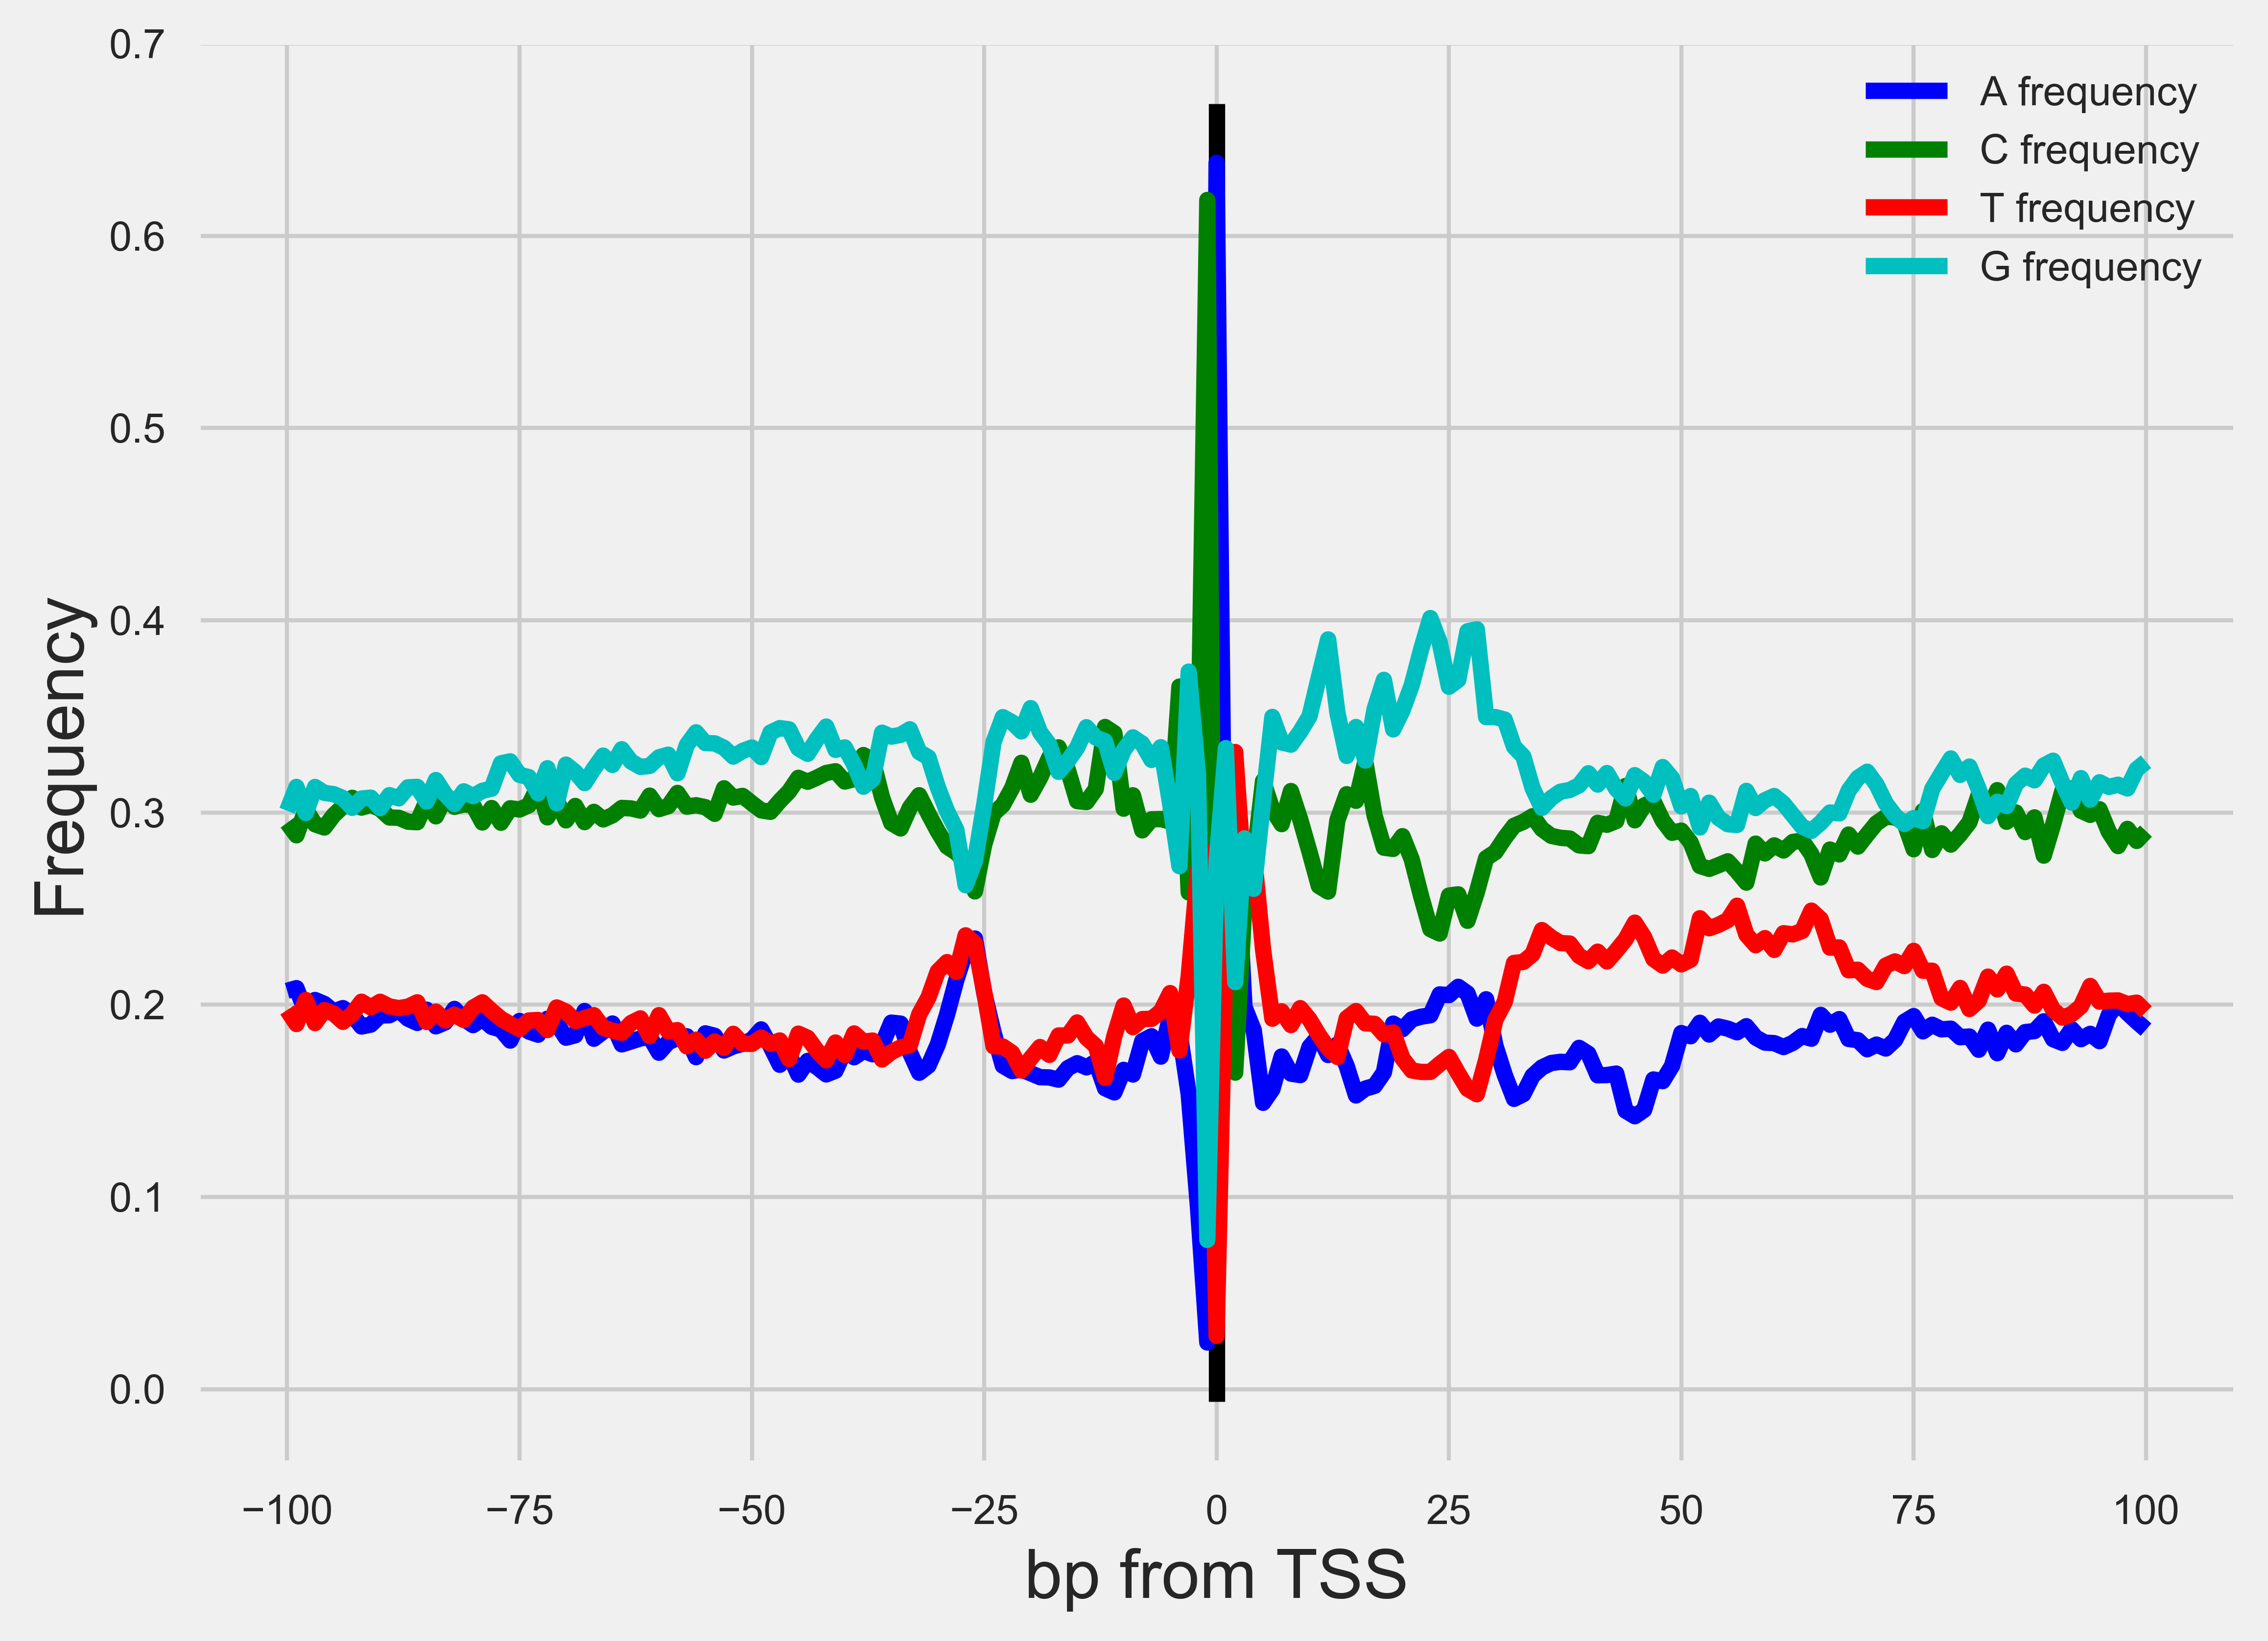

In [45]:
homer_nucleotide("Results/tss_annotation_peaks/sample_CHO_GROCap1_and_CHO_GRO1.tsv",
    'Results/Figures/Figure3/C_ii_exp.nuc_freq_200.txt',
    ref_fa,
    size=200)